In [2]:
#The main objective of this project is to 
#cover the simple steps involvoed in data pre-processing.


#How data will be prepared::

# 1. Raw data
# 2. structure data
# 3. data preprocessing
# 4. Exploration data analysis
# 5. Insigh on data


# Before going overboard, lets discuss basict terms involved in this 
# project.

# 1. EDA - Exploratory Data Analysis (EDA) is a method of analyzing 
#    datasets to understand their main characteristics. It involves 
#    summarizing data features, detecting patterns, and uncovering 
#    relationships through visual and statistical techniques. EDA helps 
#    in gaining insights and formulating hypotheses for further analysis.


# 2. Data preprocessing - Data pre-processing involves cleaning and preparing 
#    raw data to facilitate feature engineering. Meanwhile, feature engineering 
#    entails employing various techniques to manipulate the data. This may include
#    adding or removing relevant features, handling missing data, encoding variables,
#     and dealing with categorical variables, among other tasks.
    
# 3. Feature Engineering - feature engineering is a critical task that significantly 
#    influences the outcome of a model. It involves crafting new features based on
#    existing data while pre-processing primarily focuses on cleaning and organizing 
#    the data.




In [2]:
# Now in first step, we'll install libraries that are requiured for eda process

# 1.numpy - NumPy arrays are faster and more compact than Python lists. An array 
#   consumes less memory and is convenient to use. NumPy uses much less memory to 
#   store data and it provides a mechanism of specifying the data types


# 2.pandas - Pandas is a Python library for data analysis. Pandas is built on top
#   of two core Python libraries—matplotlib for data visualization and NumPy for
#   mathematical operations. … Pandas acts as a wrapper over these libraries, allowing you to access many of matplotlib's and NumPy's methods with less code.


# 3.matplotlib - Matplotlib is a multi-platform data visualization library built on NumPy arrays


# 4.seaborn - Seaborn is a library in Python predominantly used for making statistical
#   graphics. Seaborn is a data visualization library built on top of matplotlib and closely
#   integrated with pandas data structures in Python. Visualization is the central part of 
#   Seaborn which helps in the exploration and understanding of data.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# step 2: After inporting multiple libraries that are required for data analysis
# we will now import dataset using pandas, we can also use numpy to load dataset
# but most of the data are availabel in tabulare format of csv file so using pandas 
# will be more effective and its terndy too. The Pandas library offers
# a wide range of possibilities for loading data into the pandas DataFrame from files 
# like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

data = pd.read_csv("C:\\Users\\my\\Desktop\\Pyhton-project-main\\prompt\\prompt_engineering_dataset.csv")
print(data)


numerical_stats = data.describe()
print("Numerical Statistics:")
print(numerical_stats)

# Get basic statistics for categorical columns
# For example, for the 'Prompt_Type' column
prompt_type_counts = data['Prompt_Type'].value_counts()
print("\nPrompt Type Counts:")
print(prompt_type_counts)

# Get statistics for 'Prompt_Length'
length_stats = data['Prompt_Length'].describe()
print("\nPrompt Length Statistics:")
print(length_stats)

# Get statistics for 'Response'
response_stats = data['Response'].describe()
print("\nResponse Statistics:")
print(response_stats)

#head() will display the top 5 observations of the dataset
data.head()

#tail() will display the last 5 observations of the dataset
data.tail()

#info() helps to understand the data type and information about data, including the number of records in each
#column, data having null or not null, Data type, the memory usage of the dataset
data.info()



                                        Prompt Prompt_Type  Prompt_Length  \
0        Where do you see yourself in 5 years?    Question             37   
1      Summarize the plot of Romeo and Juliet.     Command             39   
2                       I'm feeling sad today.  Open-ended             22   
3     Why do you think education is important?    Question             40   
4       List the ingredients for making pizza.     Command             38   
...                                        ...         ...            ...   
5005   Describe the process of photosynthesis.     Command             39   
5006                    I'm feeling sad today.  Open-ended             22   
5007                    How do you cook pasta?    Question             22   
5008    List the ingredients for making pizza.     Command             38   
5009              I don't understand calculus.  Open-ended             28   

                                               Response  
0     In 5 years,

In [5]:
# Display the first few rows of the dataset
print(data.head())

# Get basic statistics for numerical columns
numerical_stats = data.describe()
print("Numerical Statistics:")
print(numerical_stats)

# Get basic statistics for categorical columns
# For example, for the 'Prompt_Type' column
prompt_type_counts = data['Prompt_Type'].value_counts()
print("\nPrompt Type Counts:")
print(prompt_type_counts)

# Get statistics for 'Prompt_Length'
length_stats = data['Prompt_Length'].describe()
print("\nPrompt Length Statistics:")
print(length_stats)

# Get statistics for 'Response'
response_stats = data['Response'].describe()
print("\nResponse Statistics:")
print(response_stats)

                                     Prompt Prompt_Type  Prompt_Length  \
0     Where do you see yourself in 5 years?    Question             37   
1   Summarize the plot of Romeo and Juliet.     Command             39   
2                    I'm feeling sad today.  Open-ended             22   
3  Why do you think education is important?    Question             40   
4    List the ingredients for making pizza.     Command             38   

                                            Response  new col  
0  In 5 years, I see myself advancing in my caree...        0  
1  Romeo and Juliet is a tragedy by William Shake...        1  
2  I'm sorry to hear that you're feeling down. It...        2  
3  I believe education is important because it em...        3  
4  To make pizza, you'll need dough, tomato sauce...        4  
Numerical Statistics:
       Prompt_Length      new col
count    5010.000000  5010.000000
mean       29.420359  2504.500000
std         7.640619  1446.406755
min        15

In [7]:
# Step 3: Data Reduction
# Some columns or variables can be dropped if they do not add value to our analysis.

data['new col'] = [x for x in range(len(data))]

data.head()
data.columns
# data = data.drop(columns = ['new col'])
# data.describe()
# data.info()

# ==============================
# Handling Missing Values
# ==============================

# Check for Missing Values
print("Missing Values in Each Column:")
print(data.isnull().sum())

# Calculate the Percentage of Missing Values
missing_percentage = data.isnull().sum() / len(data) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Impute Missing Values or Drop Rows
# Example: If 'Response' is critical, we might drop rows with missing values in that column
data = data.dropna(subset=['Response'])

# Check again for missing values after dropping
print("\nMissing Values After Handling:")
print(data.isnull().sum())

# ==============================
# Data Reduction
# ==============================

# Drop Unnecessary Columns
# Example: If a column is deemed irrelevant, drop it
# data = data.drop(columns=['Unnecessary_Column'])

# Optionally, reduce the dataset by keeping only relevant columns
reduced_data = data[['Prompt', 'Prompt_Type', 'Prompt_Length', 'Response']]
print("\nReduced Data Shape:", reduced_data.shape)


Missing Values in Each Column:
Prompt           0
Prompt_Type      0
Prompt_Length    0
Response         0
new col          0
dtype: int64

Percentage of Missing Values:
Prompt           0.0
Prompt_Type      0.0
Prompt_Length    0.0
Response         0.0
new col          0.0
dtype: float64

Missing Values After Handling:
Prompt           0
Prompt_Type      0
Prompt_Length    0
Response         0
new col          0
dtype: int64

Reduced Data Shape: (5010, 4)


In [7]:
# Step 6: Data Cleaning/Wrangling
# Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, 
# and some variables may need data type conversion.

print(data.nunique())


Prompt             15
Prompt_Type         3
Prompt_Length      11
Response           15
new col          5010
dtype: int64


C:\Users\my\AppData\Local\Temp\ipykernel_8652\2754452404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prompt_Type', data=data, palette='viridis')


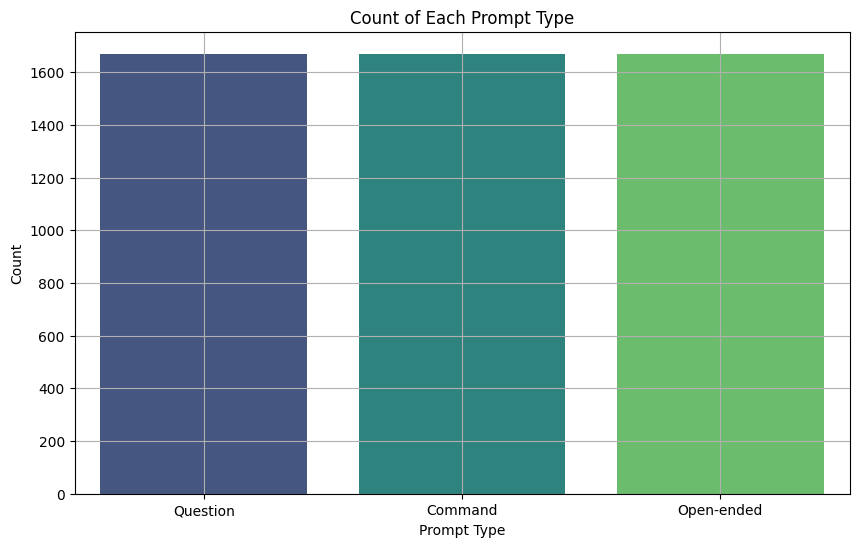

In [8]:

# 1. Bar Plot: Count of Each Prompt Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Prompt_Type', data=data, palette='viridis')
plt.title('Count of Each Prompt Type')
plt.xlabel('Prompt Type')
plt.ylabel('Count')
plt.grid()
plt.show()

C:\Users\my\AppData\Local\Temp\ipykernel_8652\1586348673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Prompt_Type', y='Prompt_Length', data=data, palette='Set2')


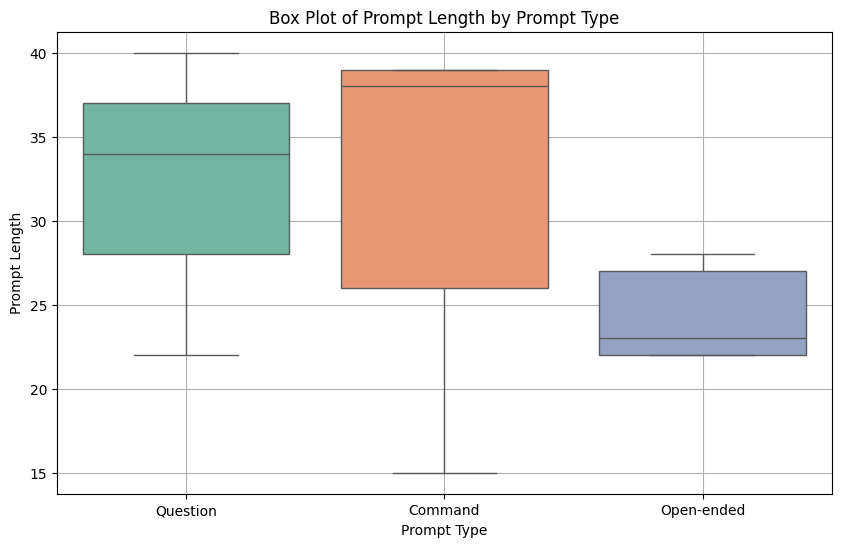

In [9]:
# 2. Box Plot: Distribution of Prompt Length by Prompt Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prompt_Type', y='Prompt_Length', data=data, palette='Set2')
plt.title('Box Plot of Prompt Length by Prompt Type')
plt.xlabel('Prompt Type')
plt.ylabel('Prompt Length')
plt.grid()
plt.show()

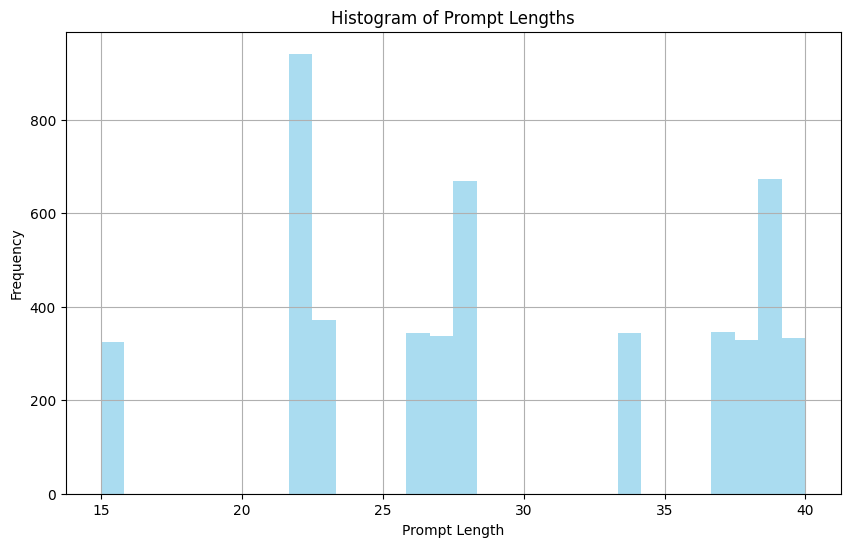

In [10]:
# 3. Histogram: Distribution of Prompt Lengths
plt.figure(figsize=(10, 6))
plt.hist(data['Prompt_Length'], bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Prompt Lengths')
plt.xlabel('Prompt Length')
plt.ylabel('Frequency')
plt.grid()
plt.show()


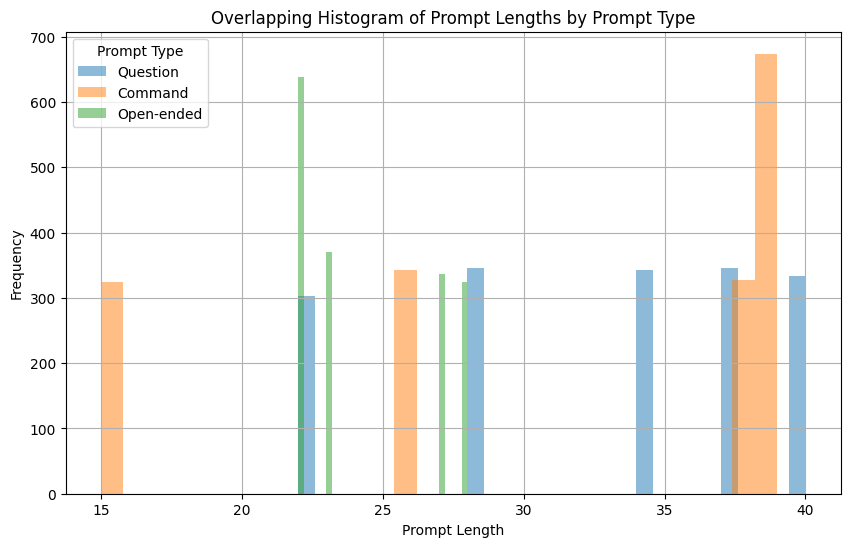

In [11]:
# 4. Overlapping Histogram: Prompt Length by Prompt Type
plt.figure(figsize=(10, 6))
for prompt_type in data['Prompt_Type'].unique():
    subset = data[data['Prompt_Type'] == prompt_type]
    plt.hist(subset['Prompt_Length'], bins=30, alpha=0.5, label=str(prompt_type))
plt.title('Overlapping Histogram of Prompt Lengths by Prompt Type')
plt.xlabel('Prompt Length')
plt.ylabel('Frequency')
plt.legend(title='Prompt Type')
plt.grid()
plt.show()

C:\Users\my\AppData\Local\Temp\ipykernel_8652\3068881872.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Prompt_Type', y='Prompt_Length', data=data, palette='muted')


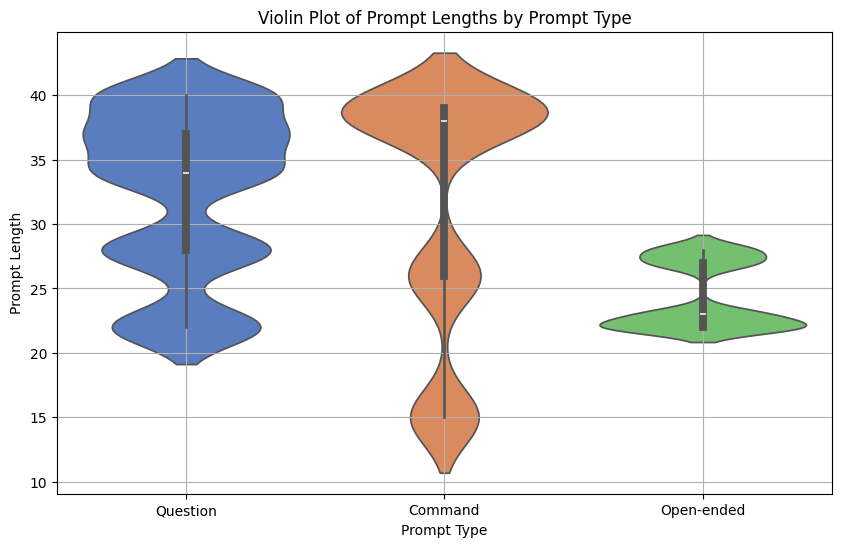

In [12]:
# 5. Violin Plot: Distribution of Prompt Lengths by Prompt Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Prompt_Type', y='Prompt_Length', data=data, palette='muted')
plt.title('Violin Plot of Prompt Lengths by Prompt Type')
plt.xlabel('Prompt Type')
plt.ylabel('Prompt Length')
plt.grid()
plt.show()


In [14]:
# 6. Heatmap: Correlation Matrix of Numerical Variables
# First, create a correlation matrix
data['Prompt_Type'] = data['Prompt_Type'].astype('category').cat.codes
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Where do you see yourself in 5 years?'

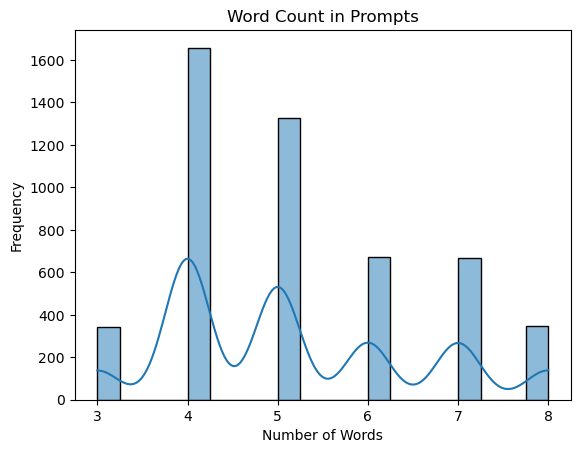

In [31]:
# Word Count Distribution in Prompts

data['prompt_word_count'] = data['Prompt'].apply(lambda x: len(x.split()))
sns.histplot(data['prompt_word_count'], bins=20, kde=True)
plt.title('Word Count in Prompts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


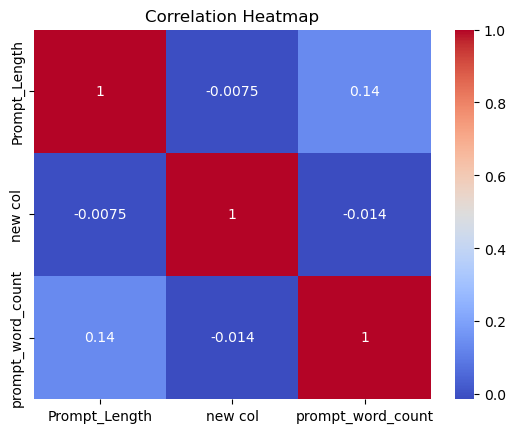

In [32]:
# Correlation Heatmap 

numeric_data = data.select_dtypes(include='number')  # Select numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


In [25]:
print(data.columns)

Index(['Prompt', 'Prompt_Type', 'Prompt_Length', 'Response', 'new col'], dtype='object')


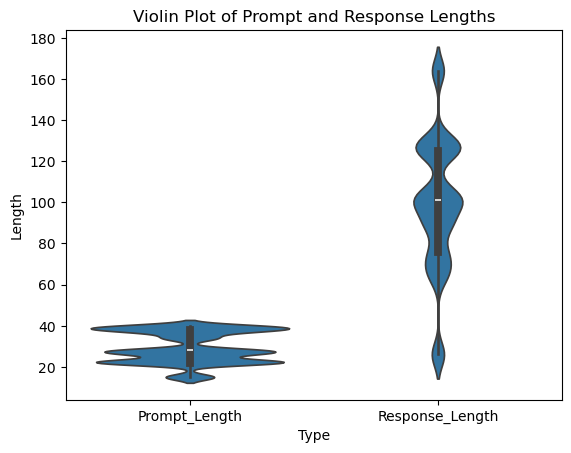

In [8]:
# Assuming data contains columns 'prompt_length' and 'response_length'
data['Prompt_Length'] = data['Prompt'].apply(len)
data['Response_Length'] = data['Response'].apply(len)

# Reshape the data for a combined violin plot
lengths = data[['Prompt_Length', 'Response_Length']].melt(var_name="Type", value_name="Length")

# Plotting
sns.violinplot(x="Type", y="Length", data=lengths)
plt.title('Violin Plot of Prompt and Response Lengths')
plt.xlabel('Type')
plt.ylabel('Length')
plt.show()

In [6]:
#converting columns into numpy arrays

prompt_lengths = np.array(data['Prompt'].apply(len))
response_lengths = np.array(data['Response'].apply(len))

print(prompt_lengths, response_lengths)


print("Mean prompt length:", np.mean(prompt_lengths))
print("Median prompt length:", np.median(prompt_lengths))
print("Standard deviation of prompt lengths:", np.std(prompt_lengths))

[37 39 22 ... 22 38 28] [ 89 164 125 ...  90 128 101]
Mean prompt length: 29.420359281437126
Median prompt length: 28.0
Standard deviation of prompt lengths: 7.639856664293956
